          Time  Stock Price
0     1.000000   106.967142
1     1.030100   100.739570
2     1.060201   108.724936
3     1.090301   117.607811
4     1.120401   100.169065
5     1.150502   100.305939
6     1.180602   118.579770
7     1.210702   110.605948
8     1.240803    98.384439
9     1.270903   108.655989
10    1.301003    98.751042
11    1.331104    98.886376
12    1.361204   106.125375
13    1.391304    84.738653
14    1.421405    86.791604
15    1.451505    98.590858
16    1.481605    94.261998
17    1.511706   107.712981
18    1.541806    95.674091
19    1.571906    90.818742
20    1.602007   119.789339
21    1.632107   103.069784
22    1.662207   106.201149
23    1.692308    91.480329
24    1.722408   100.489552
25    1.752508   107.251797
26    1.782609    94.845452
27    1.812709   110.328808
28    1.842809   100.785506
29    1.872910   104.098644
30    1.903010   101.225828
31    1.933110   125.996613
32    1.963211   107.573420
33    1.993311    97.369468
34    2.023411   116

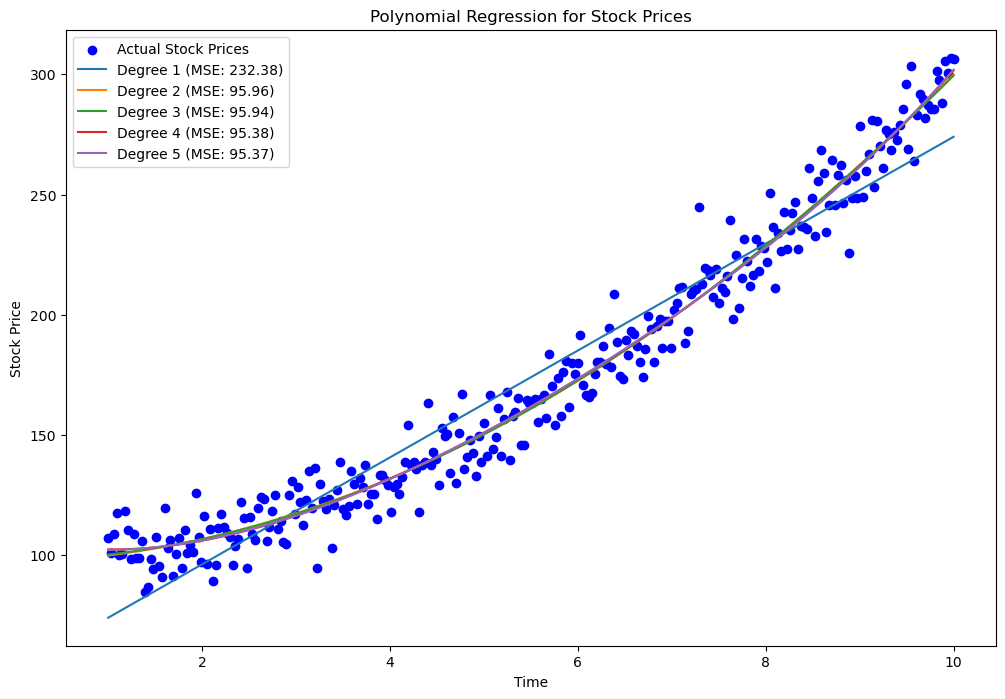

Degree 1 - Mean Squared Error: 232.38
Degree 2 - Mean Squared Error: 95.96
Degree 3 - Mean Squared Error: 95.94
Degree 4 - Mean Squared Error: 95.38
Degree 5 - Mean Squared Error: 95.37
INTERPRETATION
Degree 1: The model with a linear relationship (degree 1) has an MSE of 232.38. This means that, on average, the squared difference between the predicted values and actual values is 232.38.
Degree 2: The model with a quadratic relationship (degree 2) has a lower MSE of 95.96, indicating a better fit compared to the linear model.
Degree 3, Degree 4, Degree 5: As the degree of the polynomial increases, the MSE values continue to decrease, reaching a minimum at degree 4 and degree 5.


In [1]:
#Question 6:Non-Linear Trend in Stock Prices

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Generate synthetic data for stock prices over time with a non-linear trend
np.random.seed(42)
n_samples = 300
time = np.linspace(1, 10, n_samples)
stock_prices = 100 + 2*time**2 + np.random.normal(0, 10, n_samples)

# Reshape the data
X = time.reshape(-1, 1)
y = stock_prices

# Create a DataFrame with the stock price data
stock_data = pd.DataFrame({'Time': time, 'Stock Price': stock_prices})

# Display all rows of the dataset
pd.set_option('display.max_rows', None)
print(stock_data)

# Apply polynomial regression with different degrees
degrees = [1, 2, 3, 4, 5]
mse_scores = []

plt.figure(figsize=(12, 8))
plt.scatter(time, stock_prices, color='blue', label='Actual Stock Prices')

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    
    mse = mean_squared_error(y, y_pred)
    mse_scores.append(mse)
    
    plt.plot(time, y_pred, label=f'Degree {degree} (MSE: {mse:.2f})')

plt.title('Polynomial Regression for Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Analyze the performance of different polynomial degrees
for degree, mse in zip(degrees, mse_scores):
    print(f'Degree {degree} - Mean Squared Error: {mse:.2f}')
    

print("INTERPRETATION")
    
print("Degree 1: The model with a linear relationship (degree 1) has an MSE of 232.38. This means that, on average, the squared difference between the predicted values and actual values is 232.38.")    
print("Degree 2: The model with a quadratic relationship (degree 2) has a lower MSE of 95.96, indicating a better fit compared to the linear model.")
print("Degree 3, Degree 4, Degree 5: As the degree of the polynomial increases, the MSE values continue to decrease, reaching a minimum at degree 4 and degree 5.")


#Model Selection:In this case, a polynomial model of degree 4 or 5 seems to provide the best fit to the data based on the MSE values. These models have lower errors compared to lower-degree polynomials.
#However, it is important to balance model complexity with performance, as higher-degree polynomials may lead to overfitting if the model captures noise in the data rather than true patterns.

#NOTES
#We generate synthetic data for stock prices over time with a non-linear trend.
#We apply polynomial regression with degrees ranging from 1 to 5 to capture the non-linear trends.
#We evaluate the performance of each polynomial degree by calculating the Mean Squared Error (MSE) and visualize the predicted stock prices.
#You can analyze the MSE values for each polynomial degree to understand how well the model fits the data. Higher degrees may lead to overfitting, while lower degrees may underfit the data. This analysis can help you choose an appropriate polynomial degree for predicting future stock prices based on the observed non-linear trend.   